In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [106]:
data = pd.read_csv("train.csv")

In [107]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [108]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [109]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [110]:
data.shape

(1460, 81)

In [111]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [112]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [113]:
data["OverallQual"].corr(data['SalePrice'])

np.float64(0.7909816005838047)

In [114]:
data["YearBuilt"].corr(data["SalePrice"])

np.float64(0.5228973328794969)

In [115]:
data["BedroomAbvGr"].corr(data["SalePrice"])

np.float64(0.16821315430074)

In [116]:
data["SalePrice"].corr(data["SalePrice"])

np.float64(1.0)

In [117]:
data["SalePrice"].corr(data["OverallQual"])

np.float64(0.7909816005838048)

In [118]:
X = data[["GrLivArea", "OverallQual"]]
y = data["SalePrice"]

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [120]:
model = LinearRegression()

In [121]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [122]:
prediction = model.predict(X_test)

In [123]:
r2_score(y_test, prediction)

0.7455160212108591

In [124]:
mean_squared_error(y_test, prediction)

1775813064.647514

In [125]:
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
print(f"RMSE: ${rmse:.2f}")

RMSE: $42140.40


In [126]:
data["SalePrice"].mean()

np.float64(180921.19589041095)

In [127]:
# Get only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Now check correlation
numeric_data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [128]:
X = data[["OverallQual", "GrLivArea", "GarageCars","GarageArea", "TotalBsmtSF"  ]]
y = data["SalePrice"]

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

In [130]:
model = LinearRegression()

In [131]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [132]:
prediction = model.predict(X_test)

In [133]:
r2_score(y_test, prediction)

0.7936613418610969

In [134]:
mse = mean_squared_error(y_test, prediction)
mse

1439850502.9996674

In [135]:
rmse = np.sqrt(mse)
rmse

np.float64(37945.36207495809)

In [136]:
print(data[['GarageCars', 'GarageArea', 'TotalBsmtSF']].isnull())

      GarageCars  GarageArea  TotalBsmtSF
0          False       False        False
1          False       False        False
2          False       False        False
3          False       False        False
4          False       False        False
...          ...         ...          ...
1455       False       False        False
1456       False       False        False
1457       False       False        False
1458       False       False        False
1459       False       False        False

[1460 rows x 3 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

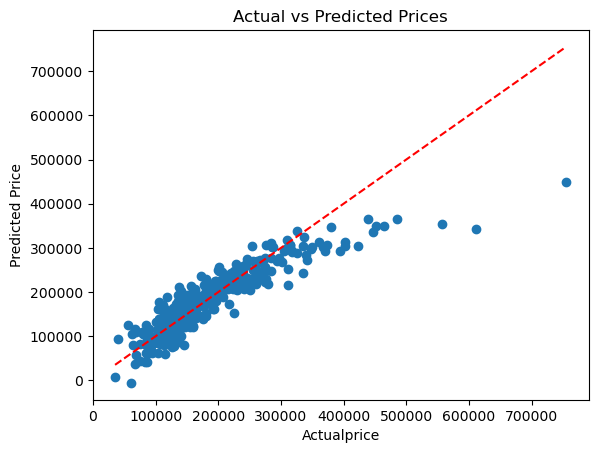

In [137]:
plt.scatter(y_test, prediction)
plt.xlabel("Actualprice")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.show


In [138]:
features_importance = pd.DataFrame({
    "feature" : X.columns,
    "coefficient" : model.coef_
})

print(features_importance)

       feature   coefficient
0  OverallQual  24066.803206
1    GrLivArea     41.168960
2   GarageCars  18531.031650
3   GarageArea      9.391396
4  TotalBsmtSF     25.199439


In [139]:
# Example: Quality=7, 2000sqft, 2 car garage, 1500sqft garage, 1000sqft basement
custom_house = [[7, 2000, 2, 400, 1000]]
predicted_price = model.predict(custom_house)
print(f"Predicted price: ${predicted_price[0]:,.2f}")

Predicted price: $223,452.01


c:\Users\Anz45\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [140]:
X.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF'], dtype='object')

In [141]:
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print(missing_data)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


In [142]:
X = data[["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "LotFrontage"]]

In [143]:
# Fill missing values properly
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())

# Check it worked
print(data['LotFrontage'].isnull().sum())  # Should be 0

0


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, 
y, random_state=42)

In [145]:
# Fill missing values properly
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())

# Check it worked
print(data['LotFrontage'].isnull().sum())  # Should be 0

0


In [146]:
X = data[["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "LotFrontage"]]
y = data["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)

r2 = r2_score(y_test, prediction)
rmse = np.sqrt(mean_squared_error(y_test, prediction))

print(f"R²: {r2}")
print(f"RMSE: ${rmse:.2f}")

R²: 0.7938928391345998
RMSE: $37924.07


In [147]:
from sklearn.tree import DecisionTreeRegressor

In [148]:
tree_model = DecisionTreeRegressor(max_depth =10, min_samples_split=20, random_state=42)
tree_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,20
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [149]:
tree_prediction = tree_model.predict(X_test)

In [150]:
tree_r2 = r2_score(y_test, tree_prediction)

In [151]:
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_prediction))

In [152]:
print(f"Decision Tree R²: {tree_r2}")
print(f"Decision Tree RMSE: ${tree_rmse:.2f}")



print(f"\nLinear Regression R²: {r2}")
print(f"Linear Regression RMSE: ${rmse:.2f}")

Decision Tree R²: 0.7630977464479082
Decision Tree RMSE: $40658.65

Linear Regression R²: 0.7938928391345998
Linear Regression RMSE: $37924.07


In [153]:
from sklearn.ensemble import RandomForestRegressor

In [154]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

In [155]:
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [156]:
rf_prediction = rf_model.predict(X_test)

In [159]:
rf_r2 = r2_score(y_test, rf_prediction)
mse = mean_squared_error(y_test, rf_prediction)
rf_rmse =  np.sqrt(mean_squared_error(y_test, rf_prediction))

In [160]:
print(f"Random Forest R²: {rf_r2}")
print(f"Random Forest RMSE: ${rf_rmse:.2f}")
print(f"\nLinear Regression R²: {r2}")
print(f"Linear Regression RMSE: ${rmse:.2f}")

Random Forest R²: 0.876273677668495
Random Forest RMSE: $29383.22

Linear Regression R²: 0.7938928391345998
Linear Regression RMSE: $29383.22


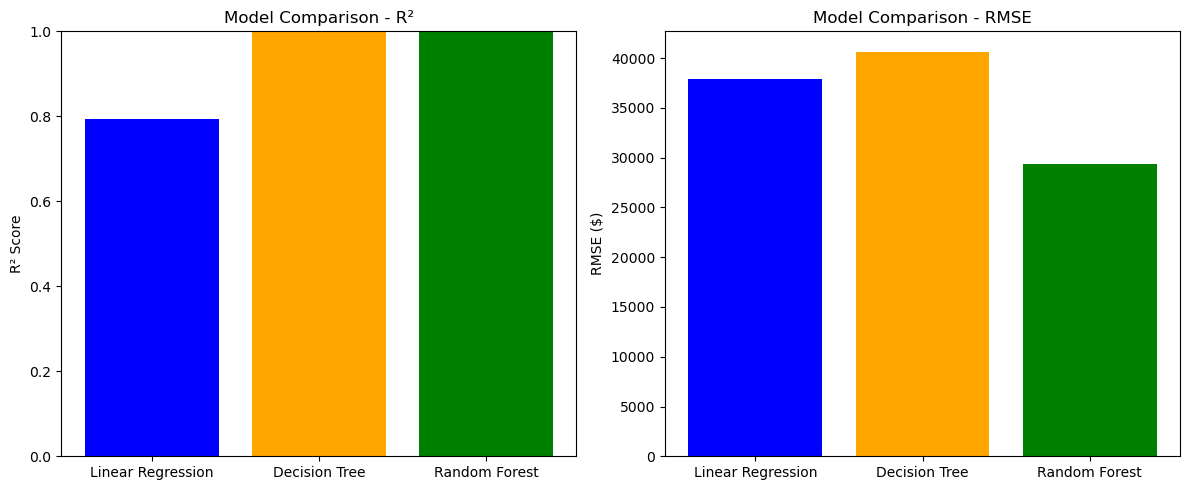

In [165]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
rt_scores = [0.794, 40658, 29383]
rmse_scores = [37924, 40658, 29383]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.bar(models, rt_scores, color =["blue", "orange","green"])
ax1.set_ylabel('R² Score')
ax1.set_title('Model Comparison - R²')
ax1.set_ylim([0, 1])


ax2.bar(models, rmse_scores, color=['blue', 'orange', 'green'])
ax2.set_ylabel('RMSE ($)')
ax2.set_title('Model Comparison - RMSE')

plt.tight_layout()
plt.show()